<a href="https://colab.research.google.com/github/idanielfelipe/peliculas/blob/master/peliculas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd              # Manipulación y análisis de datos
import numpy as np               # Manipulación y análisis de datos
import matplotlib.pyplot as plt  # Manipulación y análisis de datos
import seaborn as sns            # Estadística y análisis detallado
import statsmodels.api as sm     # Estadística y análisis detallado
from sklearn.model_selection import train_test_split  # Machine Learning y modelos
from sklearn.linear_model import LinearRegression     # Machine Learning y modelos
from sklearn.metrics import mean_squared_error, r2_score # Machine Learning y modelos

file_path = "/content/imdb_movie_dataset.csv"   # Cargar el archivo CSV
data = pd.read_csv(file_path)                   # Cargar el archivo CSV

print("Columnas disponibles en el dataset:")    # Mostrar todas las columnas disponibles
print(data.columns)

Columnas disponibles en el dataset:
Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')



En este punto, podríamos plantearnos interrogantes que nos permitan resolver inquietudes. Por ejemplo:  
- ¿Cuáles son los géneros que generan más ingresos?  
- ¿Está la puntuación de una película influenciada por su recaudación?  
- Entre otras preguntas.

Dado que tenemos 12 columnas con diferentes datos, lo primero que debemos hacer es realizar una limpieza adecuada de la información. Sin embargo, en esta ocasión, optamos por hacer una búsqueda rápida de las posibles correlaciones entre las variables (las doce columnas) para obtener una idea general de lo que los datos nos están mostrando. Para ello, decidimos realizar una **matriz de correlación**, la cual nos permite observar la relación entre todas las variables.

---

**Nota:** La matriz de correlación ignora las columnas con datos no numéricos (género, título, descripción, director, actor), ya que esta herramienta mide únicamente relaciones numéricas. Los valores de texto se consideran categóricos. Aun así, podría realizarse un análisis diferente que incluya estas columnas.


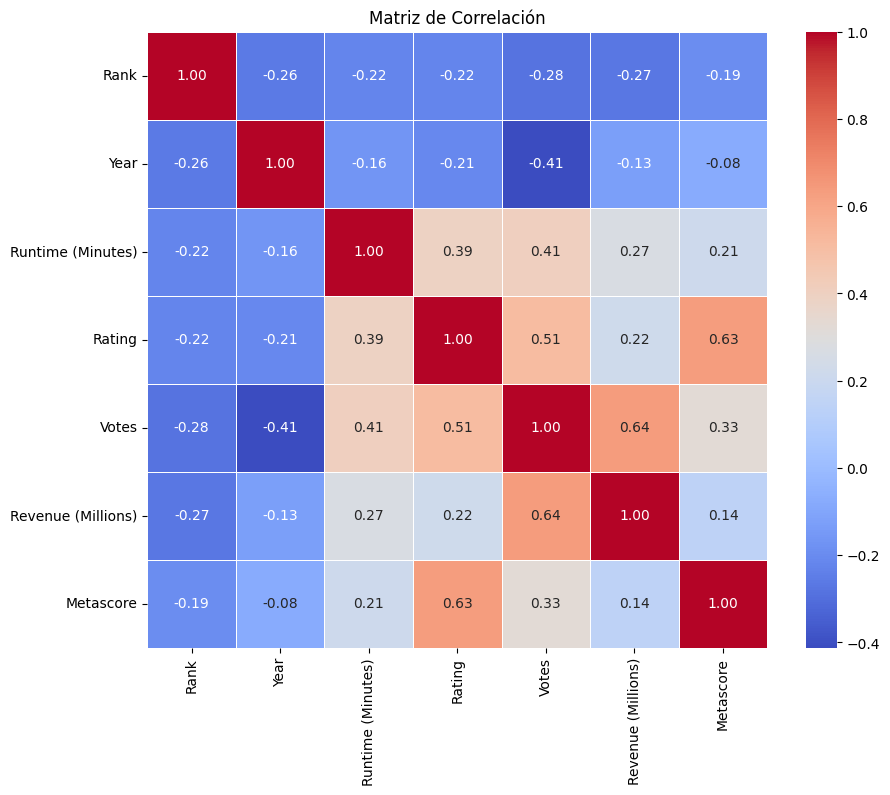

In [ ]:
#esto en automatico toma las  columnas numéricas para calcular la matriz de correlación
numerical_data = data.select_dtypes(include=['float64', 'int64'])

# calcular correlacion
correlation_matrix = numerical_data.corr()

# Visualizar la matriz de correlación como un mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlación")
plt.show()

### **Primer análisis**  
Al obtener la matriz de correlación, lo primero que debemos hacer es omitir las correlaciones propias, como la correlación perfecta entre las mismas variables, por ejemplo, "rank" y "rank". Estas solo nos indican que estamos trabajando con los mismos datos, lo cual no aporta información adicional. Por lo tanto, nos enfocaremos en las correlaciones que sean superiores a 0.6 (positivas fuertes) y menores a -0.6 (negativas fuertes). Esta decisión se toma porque dichos valores nos dan un primer indicio de que podría existir una relación significativa.  

Es importante considerar las correlaciones negativas fuertes, ya que estas no necesariamente implican errores en los datos o en el análisis. Simplemente reflejan una relación inversa entre las variables. Un ejemplo sería la probabilidad de supervivencia: a medida que aumenta la edad, la probabilidad de vivir disminuye frente a diversas enfermedades.

---

### **Nota**  
Dado que no realizamos una limpieza inicial de los datos, es necesario tener en cuenta que estas correlaciones no son completamente fiables y podrían variar. Sin embargo, esta gráfica nos proporciona un punto de partida para identificar posibles relaciones entre las variables.

---

### **Correlación positiva**  
Las variables **votos** y **revenue** muestran una correlación positiva bastante fuerte, lo que sugiere que las películas más populares tienen una mayor probabilidad de éxito financiero. Además, la relación entre las variables **rating** y **metascore** también es alta, indicando que una opinión positiva de los usuarios suele estar alineada con una buena valoración de los críticos.

Por otro lado, aunque la correlación entre **votos** y **rating** no es muy alta (0.51), no es despreciable. Si se combinara con otras variables, podría incrementar su importancia en un modelo de regresión. Es importante destacar que esta correlación no implica una relación causal directa; es decir, un aumento en la cantidad de votos no garantiza un aumento en la puntuación promedio. Más bien, sugiere que las películas con más votos tienden a tener un rango más amplio de puntuaciones, lo que no implica necesariamente que todas las películas con muchos votos tengan una calificación alta.

---

### **Correlación negativa**  
La variable **rank** tiene una correlación negativa con casi todas las demás, lo cual es completamente lógico. Esto ocurre porque el ranking es una clasificación en orden descendente. Por lo tanto, las bajas correlaciones entre el rango y variables como **votos**, **revenue** y **rating** son esperables, ya que las mejores películas (con un rango más bajo) tienden a tener mayor recaudación, más votos y mejores calificaciones.

Finalmente, es interesante analizar la relación entre el **año** y los **votos**. La correlación de -0.41, aunque no es muy alta, sugiere que las películas más recientes tienden a recibir menos votos. Esto podría deberse a dos factores:  
1. Que el público, en general, está viendo menos películas, considerando también la correlación positiva entre **votos** y **revenue**.  
2. Que las películas más antiguas han tenido más tiempo para acumular votos.


Ya que hemos realizado un primer análisis exploratorio de los datos, es necesario plantearnos preguntas más específicas que nos permitan entender el verdadero valor de la información. Por ejemplo:

- **Análisis por género**:  
  Podemos utilizar la columna "genre" para agrupar las películas en categorías como aventura, terror, acción, etc. Esto nos permitirá **evaluar si algún género en particular tiene una mayor correlación con los ingresos o las puntuaciones**. Es decir, ¿las películas de terror generan, en general, los mismos ingresos que las de aventura? ¿O el género no es un factor determinante en la recaudación?

- **Visualizaciones específicas**:  
  Podemos visualizar relaciones específicas entre variables, como votos vs. recaudación o ranking vs. puntuación en Metacritic. Antes de realizar estas visualizaciones, es fundamental limpiar los datos para asegurar su calidad y evitar posibles sesgos.

- **Modelo predictivo**:  
  Es posible construir un modelo predictivo para estimar la recaudación futura de una película utilizando regresión múltiple. Este modelo debe considerar las variables más influyentes identificadas durante el análisis exploratorio.

---

**Nota:**  
También podríamos plantear otras preguntas, como:  
- ¿Los actores más reconocidos generan mayores ingresos?  
- ¿El nombre de un director implica que una película recaude más, independientemente del género y los actores?  
- ¿Un buen director y buenos actores influyen en una buena crítica y mayor venta de entradas? ¿En qué géneros esto se cumple más?  

Sin embargo, considero que las opciones mencionadas en el párrafo anterior son las más pertinentes para nuestro análisis actual.


Para realizar la primera parte del análisis de agrupación por género, es necesario tener en cuenta que las películas pueden pertenecer a más de un género. Por ello, se considerarán únicamente los dos primeros géneros listados para acotar los datos y ser más específicos.  

La decisión de no tomar solo un género se debe al posible sesgo que esto implicaría. Al limitar una película a un único género, podríamos ignorar aspectos clave de su trama. Por ejemplo, una película puede ser de suspenso y romance al mismo tiempo; omitir el romance entre los protagonistas podría quitarle valor al análisis al no considerar el sentido completo de la trama. Este enfoque nos permite una evaluación más precisa, evitando el sesgo de encasillar una película exclusivamente en un género, especialmente cuando varias categorías forman parte integral de su narrativa.


In [ ]:
# Función para dividir y tomar los dos primeros géneros
def get_top_two_genres(genre_column):
    genres = genre_column.split(',')  # Dividir los géneros por comas
    return ','.join(genres[:2])  # Tomar solo los dos primeros géneros

# Aplicar la función a la columna 'Genre', lo que reescribe los datos en la columna principal
data['Genre'] = data['Genre'].apply(get_top_two_genres)

# Seleccionar solo las columnas 'Genre', 'Rating' y 'Revenue (Millions)'
filtered_data = data[['Genre', 'Rating', 'Revenue (Millions)']]

# Mostrar los primeros registros para confirmar que en realidad no muestra más de 6 datos
print(filtered_data.head())


               Genre  Rating  Revenue (Millions)
0   Action,Adventure     8.1              333.13
1  Adventure,Mystery     7.0              126.46
2    Horror,Thriller     7.3              138.12
3   Animation,Comedy     7.2              270.32
4   Action,Adventure     6.2              325.02


Para medir la correlación entre los géneros y la recaudación o el ranking, primero es necesario convertir los datos categóricos de los géneros en valores numéricos. La forma más sencilla de comenzar es identificando cuántos géneros diferentes existen en todo el conjunto de datos dentro de la columna **"Genre"**. Esto debe hacerse después de haber aplicado el filtro que muestra únicamente los dos primeros géneros de cada película.  

Este enfoque tiene la ventaja adicional de reducir significativamente el trabajo, ya que al limitar los géneros a solo dos por película, se simplifica el análisis sin perder demasiada información relevante.


In [ ]:
# Dividir todos los géneros en una lista (separados por coma)
all_genres = data['Genre'].str.split(',', expand=True).stack()

# Obtener géneros únicos
unique_genres = all_genres.unique()

# Mostrar la lista de géneros únicos
print("Géneros únicos:", unique_genres)

Géneros únicos: ['Action' 'Adventure' 'Mystery' 'Horror' 'Thriller' 'Animation' 'Comedy'
 'Drama' 'Family' 'Biography' 'Crime' 'Romance' 'History' 'Fantasy'
 'Sci-Fi' 'Music' 'Western' 'War' 'Musical' 'Sport']


Al identificar todos los géneros presentes en los datos, es necesario realizar un proceso combinatorio para generar una lista exhaustiva de todas las posibles combinaciones de géneros. Este paso es fundamental para asignar un valor único a cada combinación y poder analizar la correlación entre cada género o combinación de géneros con las variables de calificación (**rating**) y recaudación.

La utilización de combinatorias permitirá identificar y agrupar las filas que comparten la misma combinación de géneros, lo que facilitará el cálculo de las correlaciones correspondientes.


In [ ]:
# Crear el diccionario de combinaciones
combination_dict = {
    'Action': 1, 'Adventure': 2, 'Mystery': 3, 'Horror': 4, 'Thriller': 5, 'Animation': 6, 'Comedy': 7, 'Drama': 8,
    'Family': 9, 'Biography': 10, 'Crime': 11, 'Romance': 12, 'History': 13, 'Fantasy': 14, 'Sci-Fi': 15, 'Music': 16,
    'Western': 17, 'War': 18, 'Musical': 19, 'Sport': 20, 'Action_Adventure': 21, 'Action_Mystery': 22, 'Action_Horror': 23,
    'Action_Thriller': 24, 'Action_Animation': 25, 'Action_Comedy': 26, 'Action_Drama': 27, 'Action_Family': 28,
    'Action_Biography': 29, 'Action_Crime': 30, 'Action_Romance': 31, 'Action_History': 32, 'Action_Fantasy': 33,
    'Action_Sci-Fi': 34, 'Action_Music': 35, 'Action_Western': 36, 'Action_War': 37, 'Action_Musical': 38, 'Action_Sport': 39,
    'Adventure_Mystery': 40, 'Adventure_Horror': 41, 'Adventure_Thriller': 42, 'Adventure_Animation': 43, 'Adventure_Comedy': 44,
    'Adventure_Drama': 45, 'Adventure_Family': 46, 'Adventure_Biography': 47, 'Adventure_Crime': 48, 'Adventure_Romance': 49,
    'Adventure_History': 50, 'Adventure_Fantasy': 51, 'Adventure_Sci-Fi': 52, 'Adventure_Music': 53, 'Adventure_Western': 54,
    'Adventure_War': 55, 'Adventure_Musical': 56, 'Adventure_Sport': 57, 'Mystery_Horror': 58, 'Mystery_Thriller': 59,
    'Mystery_Animation': 60, 'Mystery_Comedy': 61, 'Mystery_Drama': 62, 'Mystery_Family': 63, 'Mystery_Biography': 64,
    'Mystery_Crime': 65, 'Mystery_Romance': 66, 'Mystery_History': 67, 'Mystery_Fantasy': 68, 'Mystery_Sci-Fi': 69,
    'Mystery_Music': 70, 'Mystery_Western': 71, 'Mystery_War': 72, 'Mystery_Musical': 73, 'Mystery_Sport': 74,
    'Horror_Thriller': 75, 'Horror_Animation': 76, 'Horror_Comedy': 77, 'Horror_Drama': 78, 'Horror_Family': 79,
    'Horror_Biography': 80, 'Horror_Crime': 81, 'Horror_Romance': 82, 'Horror_History': 83, 'Horror_Fantasy': 84,
    'Horror_Sci-Fi': 85, 'Horror_Music': 86, 'Horror_Western': 87, 'Horror_War': 88, 'Horror_Musical': 89, 'Horror_Sport': 90,
    'Thriller_Animation': 91, 'Thriller_Comedy': 92, 'Thriller_Drama': 93, 'Thriller_Family': 94, 'Thriller_Biography': 95,
    'Thriller_Crime': 96, 'Thriller_Romance': 97, 'Thriller_History': 98, 'Thriller_Fantasy': 99, 'Thriller_Sci-Fi': 100,
    'Thriller_Music': 101, 'Thriller_Western': 102, 'Thriller_War': 103, 'Thriller_Musical': 104, 'Thriller_Sport': 105,
    'Animation_Comedy': 106, 'Animation_Drama': 107, 'Animation_Family': 108, 'Animation_Biography': 109, 'Animation_Crime': 110,
    'Animation_Romance': 111, 'Animation_History': 112, 'Animation_Fantasy': 113, 'Animation_Sci-Fi': 114, 'Animation_Music': 115,
    'Animation_Western': 116, 'Animation_War': 117, 'Animation_Musical': 118, 'Animation_Sport': 119, 'Comedy_Drama': 120,
    'Comedy_Family': 121, 'Comedy_Biography': 122, 'Comedy_Crime': 123, 'Comedy_Romance': 124, 'Comedy_History': 125,
    'Comedy_Fantasy': 126, 'Comedy_Sci-Fi': 127, 'Comedy_Music': 128, 'Comedy_Western': 129, 'Comedy_War': 130,
    'Comedy_Musical': 131, 'Comedy_Sport': 132, 'Drama_Family': 133, 'Drama_Biography': 134, 'Drama_Crime': 135,
    'Drama_Romance': 136, 'Drama_History': 137, 'Drama_Fantasy': 138, 'Drama_Sci-Fi': 139, 'Drama_Music': 140,
    'Drama_Western': 141, 'Drama_War': 142, 'Drama_Musical': 143, 'Drama_Sport': 144, 'Family_Biography': 145,
    'Family_Crime': 146, 'Family_Romance': 147, 'Family_History': 148, 'Family_Fantasy': 149, 'Family_Sci-Fi': 150,
    'Family_Music': 151, 'Family_Western': 152, 'Family_War': 153, 'Family_Musical': 154, 'Family_Sport': 155,
    'Biography_Crime': 156, 'Biography_Romance': 157, 'Biography_History': 158, 'Biography_Fantasy': 159, 'Biography_Sci-Fi': 160,
    'Biography_Music': 161, 'Biography_Western': 162, 'Biography_War': 163, 'Biography_Musical': 164, 'Biography_Sport': 165,
    'Crime_Romance': 166, 'Crime_History': 167, 'Crime_Fantasy': 168, 'Crime_Sci-Fi': 169, 'Crime_Music': 170,
    'Crime_Western': 171, 'Crime_War': 172, 'Crime_Musical': 173, 'Crime_Sport': 174, 'Romance_History': 175,
    'Romance_Fantasy': 176, 'Romance_Sci-Fi': 177, 'Romance_Music': 178, 'Romance_Western': 179, 'Romance_War': 180,
    'Romance_Musical': 181, 'Romance_Sport': 182, 'History_Fantasy': 183, 'History_Sci-Fi': 184, 'History_Music': 185,
    'History_Western': 186, 'History_War': 187, 'History_Musical': 188, 'History_Sport': 189, 'Fantasy_Sci-Fi': 190,
    'Fantasy_Music': 191, 'Fantasy_Western': 192, 'Fantasy_War': 193, 'Fantasy_Musical': 194, 'Fantasy_Sport': 195,
    'Sci-Fi_Music': 196, 'Sci-Fi_Western': 197, 'Sci-Fi_War': 198, 'Sci-Fi_Musical': 199, 'Sci-Fi_Sport': 200,
    'Music_Western': 201, 'Music_War': 202, 'Music_Musical': 203, 'Music_Sport': 204, 'Western_War': 205,
    'Western_Musical': 206, 'Western_Sport': 207, 'War_Musical': 208, 'War_Sport': 209, 'Musical_Sport': 210
}

In [ ]:
# Función para asignar el número basado en los géneros
def get_genre_number(genre_column):
    # Dividir los géneros por coma
    genres = genre_column.split(',')
    # Buscar en el diccionario el número correspondiente a la combinación
    genre_key = '_'.join(sorted(genres[:2]))  # Ordenar y tomar los dos primeros géneros
    return combination_dict.get(genre_key, combination_dict.get(genres[0], np.nan))  # Buscar el número o NaN si no lo encuentra

# Aplicar la función a la columna 'Genre'
data['Genre'] = data['Genre'].apply(get_genre_number)

# Mostrar los primeros registros para confirmar
print(data[['Genre', 'Rating', 'Revenue (Millions)']].head())

   Genre  Rating  Revenue (Millions)
0     21     8.1              333.13
1     40     7.0              126.46
2     75     7.3              138.12
3    106     7.2              270.32
4     21     6.2              325.02


Procederemos a calcular la correlación entre la calificación (**rating**) y la recaudación (**revenue**) para cada género o combinación de géneros específicos. Es importante tener en cuenta que podrían encontrarse valores nulos en algunos casos, debido a que el análisis abarca todas las posibles combinaciones numéricas entre 1 y 210.  

La ausencia de datos en ciertas combinaciones es una posibilidad que siempre debemos considerar al realizar este tipo de análisis.


In [ ]:
# Función para calcular la correlación para cada valor único en 'Genre'
def calculate_correlations(data):
    correlation_results = {}

    # Iterar sobre los valores únicos de 'Genre' (ordenados de menor a mayor)
    for genre_value in sorted(data['Genre'].unique()):
        # Filtrar las filas con el mismo valor en 'Genre'
        genre_data = data[data['Genre'] == genre_value]

        # Calcular la correlación entre 'Rating' y 'Revenue (Millions)'
        correlation = genre_data[['Rating', 'Revenue (Millions)']].corr().iloc[0, 1]

        # Guardar el resultado en el diccionario
        correlation_results[genre_value] = correlation

    return correlation_results

# Calcular las correlaciones
correlations = calculate_correlations(data)

# Ordenar los resultados de menor a mayor por el número de Genre
sorted_correlations = dict(sorted(correlations.items()))

# Mostrar los resultados
for genre, correlation in sorted_correlations.items():
    print(f"Genre {genre}: Correlation = {correlation}")

Genre 1: Correlation = nan
Genre 2: Correlation = nan
Genre 4: Correlation = 0.42998842587230773
Genre 5: Correlation = nan
Genre 7: Correlation = 0.34905400543322895
Genre 8: Correlation = 0.2716133378607638
Genre 10: Correlation = 0.48198425530951383
Genre 11: Correlation = 0.45027176190750234
Genre 14: Correlation = 1.0000000000000018
Genre 15: Correlation = 1.0000000000000002
Genre 21: Correlation = 0.4919698721230674
Genre 22: Correlation = 0.9077440670904547
Genre 23: Correlation = -0.02451354653072385
Genre 24: Correlation = 0.7325724362641971
Genre 25: Correlation = 0.30273893690352743
Genre 26: Correlation = 0.05412154514853256
Genre 27: Correlation = 0.04323754200640194
Genre 29: Correlation = -0.07977432679025633
Genre 30: Correlation = 0.6030035008260689
Genre 33: Correlation = 0.669181979438789
Genre 34: Correlation = 0.6671815499502898
Genre 40: Correlation = -1.000000000000001
Genre 41: Correlation = 0.9999999999999999
Genre 43: Correlation = 0.44237016569436893
Genre 44

Debido a la gran cantidad de datos, no se muestran en su totalidad. Por tanto, una representación gráfica, como un diagrama de barras, resuelve este problema y facilita su interpretación.


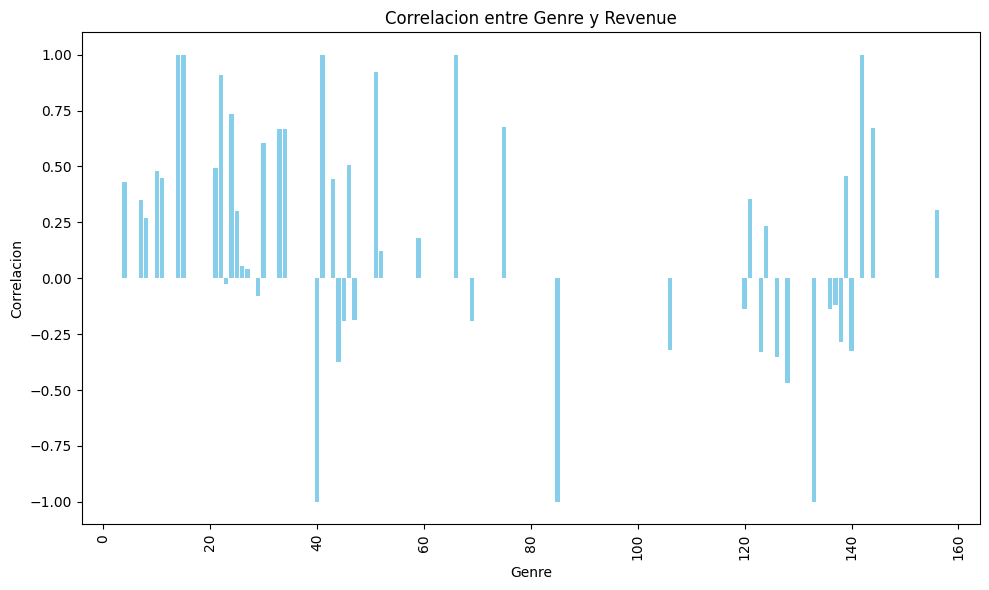

In [ ]:
import matplotlib.pyplot as plt

# Crear la gráfica de barras
def plot_correlations(correlations):
    # Ordenar las correlaciones de menor a mayor para la gráfica
    sorted_correlations = dict(sorted(correlations.items()))

    # Extraer los géneros y las correlaciones
    genres = list(sorted_correlations.keys())
    correlation_values = list(sorted_correlations.values())

    # Crear la gráfica
    plt.figure(figsize=(10, 6))
    plt.bar(genres, correlation_values, color='skyblue')
    plt.xlabel('Genre')
    plt.ylabel('Correlacion')
    plt.title('Correlacion entre Genre y Revenue')
    plt.xticks(rotation=90)  # Rotar las etiquetas para mejor visibilidad si es necesario
    plt.tight_layout()
    plt.show()

# Llamar a la función para graficar
plot_correlations(correlations)

Finalmente, aplicamos un filtro a los datos para seleccionar únicamente aquellos géneros que presentan una correlación significativa con la variable de interés. Consideraremos como significativas aquellas correlaciones cuyo valor absoluto sea superior a 0.6. De esta manera, acotamos el análisis a los géneros que muestran una relación más estrecha con la variable dependiente, lo que nos permitirá obtener resultados más precisos y relevantes. En otras palabras, esto facilita la interpretación de los resultados.


In [ ]:
# Función para filtrar las correlaciones positivas y negativas dentro de los rangos especificados
def filter_correlations(correlations):
    positive_correlations = {}
    negative_correlations = {}

    # Iterar sobre el diccionario de correlaciones
    for genre, correlation in correlations.items():
        # Filtrar correlaciones positivas mayores a 0.6
        if correlation > 0.6:
            positive_correlations[genre] = correlation
        # Filtrar correlaciones negativas menores a -0.6
        elif correlation < -0.6:
            negative_correlations[genre] = correlation

    return positive_correlations, negative_correlations

# Filtrar las correlaciones
positive_correlations, negative_correlations = filter_correlations(sorted_correlations)

# Mostrar las correlaciones positivas mayores a 0.6
print("Correlaciones positivas mayores a 0.6:")
for genre, correlation in positive_correlations.items():
    print(f"Genre {genre}: Correlation = {correlation}")

# Mostrar las correlaciones negativas menores a -0.6
print("\nCorrelaciones negativas menores a -0.6:")
for genre, correlation in negative_correlations.items():
    print(f"Genre {genre}: Correlation = {correlation}")

Correlaciones positivas mayores a 0.6:
Genre 14: Correlation = 1.0000000000000018
Genre 15: Correlation = 1.0000000000000002
Genre 22: Correlation = 0.9077440670904547
Genre 24: Correlation = 0.7325724362641971
Genre 30: Correlation = 0.6030035008260689
Genre 33: Correlation = 0.669181979438789
Genre 34: Correlation = 0.6671815499502898
Genre 41: Correlation = 0.9999999999999999
Genre 51: Correlation = 0.9212121578055269
Genre 66: Correlation = 0.9999999999999997
Genre 75: Correlation = 0.6786073513796319
Genre 142: Correlation = 0.9999999999999999
Genre 144: Correlation = 0.6726889302887653

Correlaciones negativas menores a -0.6:
Genre 40: Correlation = -1.000000000000001
Genre 85: Correlation = -1.0
Genre 133: Correlation = -0.9999999999999998


**Análisis de resultados positivos:**  
Las correlaciones positivas presentan varias relaciones casi perfectas o perfectas, como en el caso de **Genre 14**, que corresponde a fantasía. Esto implica directamente, sin lugar a discusión, que un aumento o disminución en las características asociadas al **rating** conlleva un aumento o disminución proporcional en el **revenue** (recaudación).  

Sin embargo, este resultado debe interpretarse con cautela. Aunque indica que existe una relación perfecta entre este género y las variables asociadas a **rating** y **revenue**, no significa que todas las películas de este género sean exitosas. Es posible que el dataset refleje un patrón de ingresos consistentes entre las diversas películas de fantasía, lo que genera una correlación perfecta. Esto sugiere que, aunque todas las películas de fantasía recauden casi lo mismo, no implica que sean necesariamente buenas o populares; simplemente indica que su grupo de consumidores es homogéneo, y el éxito de cada película depende principalmente de su **rating**.

---

**Análisis de resultados negativos:**  
En los géneros de **misterio** y **aventura**, encontramos una correlación inversa entre la calificación (**rating**) y la recaudación (**revenue**). Esto significa que, a medida que aumenta la calificación que recibe una película, su recaudación tiende a disminuir. En otras palabras, las películas muy bien valoradas por la crítica o el público no siempre son las que generan más dinero en taquilla.

---

**Notas:**  
Los datos podrían presentar sesgos que no hemos considerado. Por ejemplo:  
- Si solo tenemos datos de unos pocos géneros, podríamos obtener correlaciones extremas y poco representativas.  
- Es posible que las películas de **misterio** y **aventura** cuenten con una base de seguidores más reducida y especializada, que no influya significativamente en la recaudación general. Estos seguidores, al ser un grupo más cerrado, podrían valorar las películas de manera diferente al público en general.  
- Por otro lado, los géneros como la **fantasía** suelen tener presupuestos más elevados y un público objetivo más amplio, lo que podría explicar una mayor correlación entre las críticas y la recaudación.



Al regresar a la matriz de correlación, observamos una relación peculiar entre el número de votos y la recaudación, así como entre el ranking y la puntuación de Metacritic.  

Dada la diversidad de géneros presentes en los datos, surge una interrogante:  
- ¿Existe una correlación general entre el número de votos y la recaudación, independientemente del género?  
- ¿Existe una relación sistemática entre el ranking y la puntuación de Metacritic, sin considerar las particularidades de cada género?  

La matriz de correlación inicial, al no tener en cuenta las variables categóricas como el género, no nos permite responder a estas preguntas de manera precisa.


Columnas disponibles en el dataset:
Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

Valores nulos en las columnas relevantes:
Votes                   0
Revenue (Millions)    128
Rating                  0
Metascore              64
dtype: int64

Valores nulos después de la limpieza:
Votes                 0
Revenue (Millions)    0
Rating                0
Metascore             0
dtype: int64


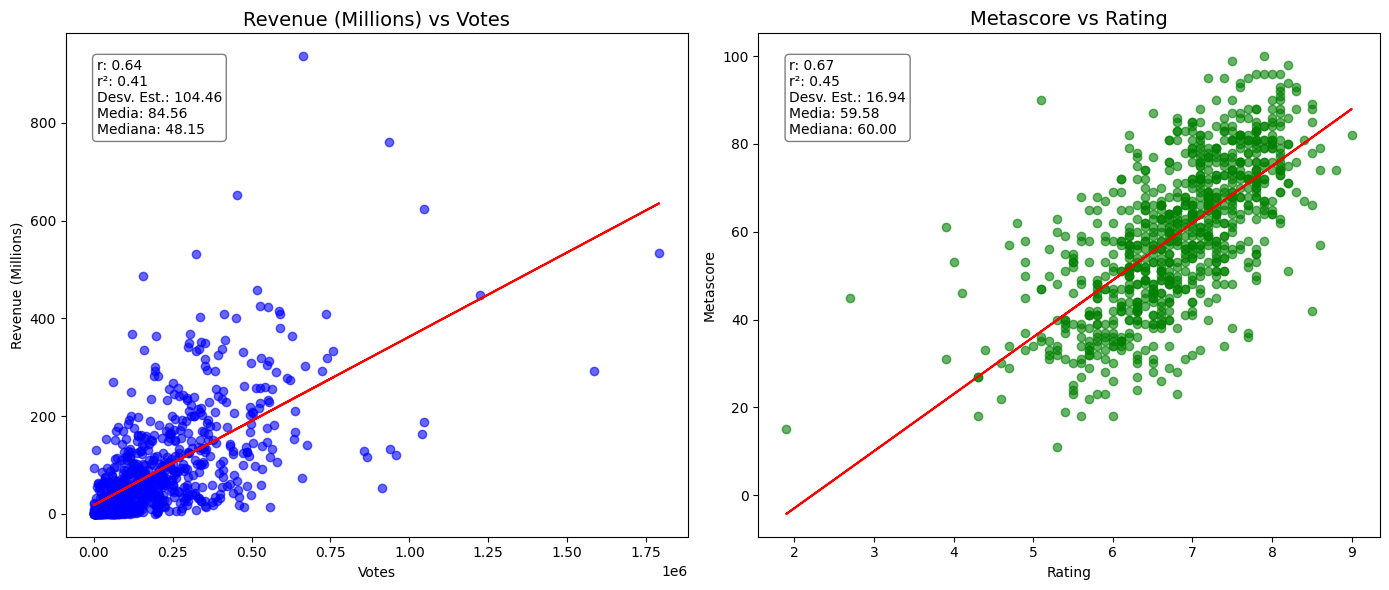

In [ ]:
# Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Cargar el archivo CSV
file_path = "/content/imdb_movie_dataset.csv"
data = pd.read_csv(file_path)

# Paso 1: Inspeccionar las columnas del dataset
print("Columnas disponibles en el dataset:")
print(data.columns)

# Paso 2: Verificar si las columnas relevantes tienen valores nulos o no numéricos
relevant_columns = ['Votes', 'Revenue (Millions)', 'Rating', 'Metascore']
print("\nValores nulos en las columnas relevantes:")
print(data[relevant_columns].isnull().sum())

# Paso 3: Limpieza de datos
# Eliminar filas con valores nulos en las columnas relevantes
cleaned_data = data[relevant_columns].dropna()

# Convertir las columnas a formato numérico (por si acaso contienen datos no numéricos)
for col in relevant_columns:
    cleaned_data[col] = pd.to_numeric(cleaned_data[col], errors='coerce')

# Verificar nuevamente valores nulos después de la limpieza
print("\nValores nulos después de la limpieza:")
print(cleaned_data.isnull().sum())

# Función para agregar línea de regresión
def plot_with_regression_and_stats(x, y, xlabel, ylabel, color, ax):
    # Ajustar el modelo lineal
    x_reshaped = x.values.reshape(-1, 1)
    model = LinearRegression()
    model.fit(x_reshaped, y)

    # Predecir los valores
    y_pred = model.predict(x_reshaped)

    # Calcular r y r^2
    r = np.corrcoef(x, y)[0, 1]
    r_squared = r ** 2

    # Calcular estadísticas
    std_dev = np.std(y)
    median = np.median(y)
    mean = np.mean(y)

    # Gráfico de dispersión y línea de regresión
    ax.scatter(x, y, color=color, alpha=0.6, label='Datos reales')
    ax.plot(x, y_pred, color='red', label='Regresión lineal')
    ax.set_title(f'{ylabel} vs {xlabel}', fontsize=14)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

    # Mostrar estadísticas dentro de la gráfica
    stats_text = (
        f"r: {r:.2f}\n"
        f"r²: {r_squared:.2f}\n"
        f"Desv. Est.: {std_dev:.2f}\n"
        f"Media: {mean:.2f}\n"
        f"Mediana: {median:.2f}"
    )
    ax.text(0.05, 0.95, stats_text, transform=ax.transAxes, fontsize=10,
            verticalalignment='top', bbox=dict(boxstyle="round", facecolor="white", alpha=0.5))

# Paso 4: Gráficas de correlación con estadísticas
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Subplot 1: Correlación entre 'Votes' y 'Revenue (Millions)'
plot_with_regression_and_stats(
    x=cleaned_data['Votes'],
    y=cleaned_data['Revenue (Millions)'],
    xlabel='Votes',
    ylabel='Revenue (Millions)',
    color='blue',
    ax=axes[0]
)

# Subplot 2: Correlación entre 'Rating' y 'Metascore'
plot_with_regression_and_stats(
    x=cleaned_data['Rating'],
    y=cleaned_data['Metascore'],
    xlabel='Rating',
    ylabel='Metascore',
    color='green',
    ax=axes[1]
)

# Ajustar diseño y mostrar gráficos
plt.tight_layout()
plt.show()


**Análisis de la primera imagen:**  
Se observa una correlación positiva moderada entre el número de votos y la recaudación. Sin embargo, solo el **41%** de la variabilidad en la recaudación puede explicarse directamente por el número de votos. El **59% restante** podría atribuirse a otros factores como el género de la película, la dirección, el elenco, la duración, entre otros.

La recaudación promedio es de **84 millones de dólares**, pero el valor central de los datos (mediana) se encuentra en **48 millones**. Esta discrepancia sugiere que, aunque el promedio es elevado, muchas películas recaudan menos que este valor. Esto indica que un pequeño número de películas muy exitosas influyen significativamente en la recaudación promedio. La alta desviación estándar de **104 millones** confirma esta gran dispersión en los datos.

---

**Análisis de la segunda imagen:**  
La segunda imagen revela una correlación positiva fuerte entre el ranking otorgado por los usuarios y la puntuación de Metacritic. Esto sugiere que, en general, a medida que aumenta la valoración de los usuarios, también lo hace la puntuación de los críticos. Sin embargo, esta correlación explica solo el **45%** de la variabilidad en la puntuación de Metacritic, lo que indica que otros factores, como el género, el elenco, el año de lanzamiento y la perspectiva más técnica de los críticos, influyen en la discrepancia entre ambas valoraciones.

La cercanía entre la **media** y la **mediana** de la puntuación de Metacritic sugiere una distribución relativamente simétrica de los datos, lo que refuerza la idea de una cierta concordancia entre las opiniones de usuarios y críticos. La desviación estándar de **16**, aunque considerable, es comprensible dada la subjetividad inherente a las valoraciones y la diversidad de criterios utilizados por usuarios y críticos.


Por tanto, nos queda realizar una simulación de predicción de rendimientos.

Para el análisis final, nos centraremos exclusivamente en las películas de fantasía. Considerando las variables **'año'** y **'recaudación'**, desarrollaremos un modelo predictivo que permita estimar la recaudación potencial de una nueva película de fantasía en los próximos dos años.  

Este modelo tomará en cuenta factores como el género, la recaudación histórica y el ranking de la película.


Cargamos nuestro primer código, el cual nos permitió establecer una correlación entre cada género, el ranking y las ganancias obtenidas. Con esta base, podemos seleccionar un género específico, como el **género 21**, y analizar la evolución de sus ingresos a lo largo del tiempo.  

Estos datos servirán como punto de partida para realizar una simulación y proyectar su rendimiento futuro.


In [ ]:
# Función para dividir y tomar los dos primeros géneros
def get_top_two_genres(genre_column):
    genres = genre_column.split(',')
    return ','.join(genres[:2])  # Tomar solo los dos primeros géneros

# Aplicar la función a la columna 'Genre'
data['Genre'] = data['Genre'].apply(get_top_two_genres)

# Seleccionar solo las columnas 'Genre', 'Rating', y 'Revenue (Millions)'
filtered_data = data[['Genre', 'Rating', 'Revenue (Millions)']]

# Dividir todos los géneros en una lista (separados por coma)
all_genres = data['Genre'].str.split(',', expand=True).stack()

# Obtener géneros únicos
unique_genres = all_genres.unique()

# Crear el diccionario de combinaciones
combination_dict = {
    'Action': 1, 'Adventure': 2, 'Mystery': 3, 'Horror': 4, 'Thriller': 5, 'Animation': 6, 'Comedy': 7, 'Drama': 8,
    'Family': 9, 'Biography': 10, 'Crime': 11, 'Romance': 12, 'History': 13, 'Fantasy': 14, 'Sci-Fi': 15, 'Music': 16,
    'Western': 17, 'War': 18, 'Musical': 19, 'Sport': 20, 'Action_Adventure': 21, 'Action_Mystery': 22, 'Action_Horror': 23,
    'Action_Thriller': 24, 'Action_Animation': 25, 'Action_Comedy': 26, 'Action_Drama': 27, 'Action_Family': 28,
    'Action_Biography': 29, 'Action_Crime': 30, 'Action_Romance': 31, 'Action_History': 32, 'Action_Fantasy': 33,
    'Action_Sci-Fi': 34, 'Action_Music': 35, 'Action_Western': 36, 'Action_War': 37, 'Action_Musical': 38, 'Action_Sport': 39,
    'Adventure_Mystery': 40, 'Adventure_Horror': 41, 'Adventure_Thriller': 42, 'Adventure_Animation': 43, 'Adventure_Comedy': 44,
    'Adventure_Drama': 45, 'Adventure_Family': 46, 'Adventure_Biography': 47, 'Adventure_Crime': 48, 'Adventure_Romance': 49,
    'Adventure_History': 50, 'Adventure_Fantasy': 51, 'Adventure_Sci-Fi': 52, 'Adventure_Music': 53, 'Adventure_Western': 54,
    'Adventure_War': 55, 'Adventure_Musical': 56, 'Adventure_Sport': 57, 'Mystery_Horror': 58, 'Mystery_Thriller': 59,
    'Mystery_Animation': 60, 'Mystery_Comedy': 61, 'Mystery_Drama': 62, 'Mystery_Family': 63, 'Mystery_Biography': 64,
    'Mystery_Crime': 65, 'Mystery_Romance': 66, 'Mystery_History': 67, 'Mystery_Fantasy': 68, 'Mystery_Sci-Fi': 69,
    'Mystery_Music': 70, 'Mystery_Western': 71, 'Mystery_War': 72, 'Mystery_Musical': 73, 'Mystery_Sport': 74,
    'Horror_Thriller': 75, 'Horror_Animation': 76, 'Horror_Comedy': 77, 'Horror_Drama': 78, 'Horror_Family': 79,
    'Horror_Biography': 80, 'Horror_Crime': 81, 'Horror_Romance': 82, 'Horror_History': 83, 'Horror_Fantasy': 84,
    'Horror_Sci-Fi': 85, 'Horror_Music': 86, 'Horror_Western': 87, 'Horror_War': 88, 'Horror_Musical': 89, 'Horror_Sport': 90,
    'Thriller_Animation': 91, 'Thriller_Comedy': 92, 'Thriller_Drama': 93, 'Thriller_Family': 94, 'Thriller_Biography': 95,
    'Thriller_Crime': 96, 'Thriller_Romance': 97, 'Thriller_History': 98, 'Thriller_Fantasy': 99, 'Thriller_Sci-Fi': 100,
    'Thriller_Music': 101, 'Thriller_Western': 102, 'Thriller_War': 103, 'Thriller_Musical': 104, 'Thriller_Sport': 105,
    'Animation_Comedy': 106, 'Animation_Drama': 107, 'Animation_Family': 108, 'Animation_Biography': 109, 'Animation_Crime': 110,
    'Animation_Romance': 111, 'Animation_History': 112, 'Animation_Fantasy': 113, 'Animation_Sci-Fi': 114, 'Animation_Music': 115,
    'Animation_Western': 116, 'Animation_War': 117, 'Animation_Musical': 118, 'Animation_Sport': 119, 'Comedy_Drama': 120,
    'Comedy_Family': 121, 'Comedy_Biography': 122, 'Comedy_Crime': 123, 'Comedy_Romance': 124, 'Comedy_History': 125,
    'Comedy_Fantasy': 126, 'Comedy_Sci-Fi': 127, 'Comedy_Music': 128, 'Comedy_Western': 129, 'Comedy_War': 130,
    'Comedy_Musical': 131, 'Comedy_Sport': 132, 'Drama_Family': 133, 'Drama_Biography': 134, 'Drama_Crime': 135,
    'Drama_Romance': 136, 'Drama_History': 137, 'Drama_Fantasy': 138, 'Drama_Sci-Fi': 139, 'Drama_Music': 140,
    'Drama_Western': 141, 'Drama_War': 142, 'Drama_Musical': 143, 'Drama_Sport': 144, 'Family_Biography': 145,
    'Family_Crime': 146, 'Family_Romance': 147, 'Family_History': 148, 'Family_Fantasy': 149, 'Family_Sci-Fi': 150,
    'Family_Music': 151, 'Family_Western': 152, 'Family_War': 153, 'Family_Musical': 154, 'Family_Sport': 155,
    'Biography_Crime': 156, 'Biography_Romance': 157, 'Biography_History': 158, 'Biography_Fantasy': 159, 'Biography_Sci-Fi': 160,
    'Biography_Music': 161, 'Biography_Western': 162, 'Biography_War': 163, 'Biography_Musical': 164, 'Biography_Sport': 165,
    'Crime_Romance': 166, 'Crime_History': 167, 'Crime_Fantasy': 168, 'Crime_Sci-Fi': 169, 'Crime_Music': 170,
    'Crime_Western': 171, 'Crime_War': 172, 'Crime_Musical': 173, 'Crime_Sport': 174, 'Romance_History': 175,
    'Romance_Fantasy': 176, 'Romance_Sci-Fi': 177, 'Romance_Music': 178, 'Romance_Western': 179, 'Romance_War': 180,
    'Romance_Musical': 181, 'Romance_Sport': 182, 'History_Fantasy': 183, 'History_Sci-Fi': 184, 'History_Music': 185,
    'History_Western': 186, 'History_War': 187, 'History_Musical': 188, 'History_Sport': 189, 'Fantasy_Sci-Fi': 190,
    'Fantasy_Music': 191, 'Fantasy_Western': 192, 'Fantasy_War': 193, 'Fantasy_Musical': 194, 'Fantasy_Sport': 195,
    'Sci-Fi_Music': 196, 'Sci-Fi_Western': 197, 'Sci-Fi_War': 198, 'Sci-Fi_Musical': 199, 'Sci-Fi_Sport': 200,
    'Music_Western': 201, 'Music_War': 202, 'Music_Musical': 203, 'Music_Sport': 204, 'Western_War': 205,
    'Western_Musical': 206, 'Western_Sport': 207, 'War_Musical': 208, 'War_Sport': 209, 'Musical_Sport': 210
}

# Función para asignar el número basado en los géneros
def get_genre_number(genre_column):
    # Dividir los géneros por coma
    genres = genre_column.split(',')
    # Buscar en el diccionario el número correspondiente a la combinación
    genre_key = '_'.join(sorted(genres[:2]))  # Ordenar y tomar los dos primeros géneros
    return combination_dict.get(genre_key, combination_dict.get(genres[0], np.nan))  # Buscar el número o NaN si no lo encuentra

# Aplicar la función a la columna 'Genre'
data['Genre'] = data['Genre'].apply(get_genre_number)

# Función para calcular la correlación para cada valor único en 'Genre'
def calculate_correlations(data):
    correlation_results = {}

    # Iterar sobre los valores únicos de 'Genre' (ordenados de menor a mayor)
    for genre_value in sorted(data['Genre'].unique()):
        # Filtrar las filas con el mismo valor en 'Genre'
        genre_data = data[data['Genre'] == genre_value]

        # Calcular la correlación entre 'Rating' y 'Revenue (Millions)'
        correlation = genre_data[['Rating', 'Revenue (Millions)']].corr().iloc[0, 1]

        # Guardar el resultado en el diccionario
        correlation_results[genre_value] = correlation

    return correlation_results

# Calcular las correlaciones
correlations = calculate_correlations(data)

# Ordenar los resultados de menor a mayor por el número de Genre
sorted_correlations = dict(sorted(correlations.items()))

# Mostrar los resultados
for genre, correlation in sorted_correlations.items():
    print(f"Genre {genre}: Correlation = {correlation}")


Genre 1: Correlation = nan
Genre 2: Correlation = nan
Genre 4: Correlation = 0.42998842587230773
Genre 5: Correlation = nan
Genre 7: Correlation = 0.34905400543322895
Genre 8: Correlation = 0.2716133378607638
Genre 10: Correlation = 0.48198425530951383
Genre 11: Correlation = 0.45027176190750234
Genre 14: Correlation = 1.0000000000000018
Genre 15: Correlation = 1.0000000000000002
Genre 21: Correlation = 0.4919698721230674
Genre 22: Correlation = 0.9077440670904547
Genre 23: Correlation = -0.02451354653072385
Genre 24: Correlation = 0.7325724362641971
Genre 25: Correlation = 0.30273893690352743
Genre 26: Correlation = 0.05412154514853256
Genre 27: Correlation = 0.04323754200640194
Genre 29: Correlation = -0.07977432679025633
Genre 30: Correlation = 0.6030035008260689
Genre 33: Correlation = 0.669181979438789
Genre 34: Correlation = 0.6671815499502898
Genre 40: Correlation = -1.000000000000001
Genre 41: Correlation = 0.9999999999999999
Genre 43: Correlation = 0.44237016569436893
Genre 44

Diferencia de rendimiento respecto al año anterior:
Year
2007    -143.51
2008     167.31
2009    1039.42
2010    -782.83
2011     183.84
2012    -327.49
2013    1004.97
2014     616.18
2015     656.39
2016    -211.38
Name: Revenue (Millions), dtype: float64


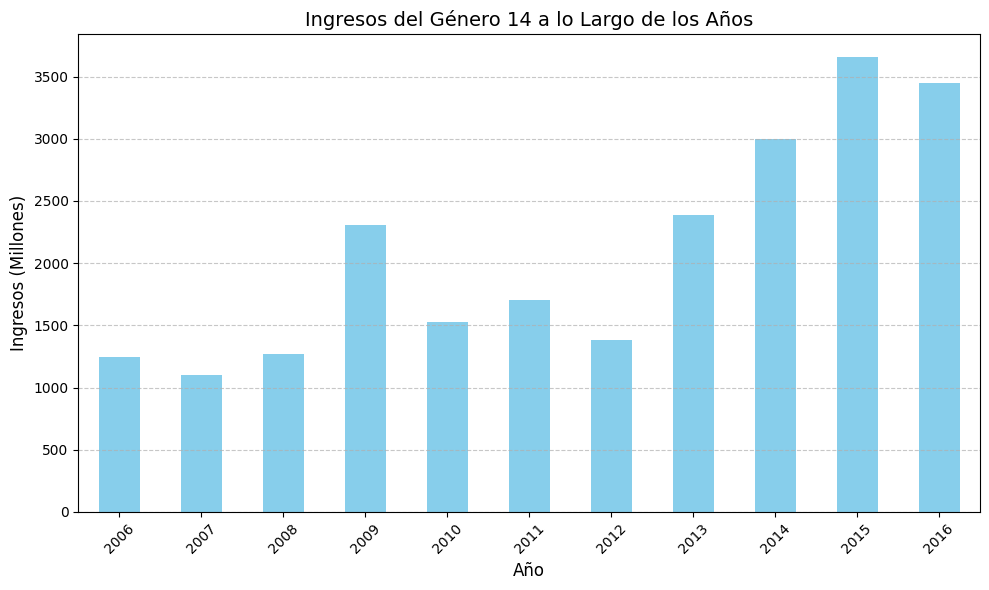

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Filtrar los datos para el género 14
genre_14_data = data[data['Genre'] == 21]

# Agrupar por año y sumar los ingresos
revenue_per_year = genre_14_data.groupby('Year')['Revenue (Millions)'].sum()

# Calcular la diferencia de ingresos respecto al año anterior
revenue_difference = revenue_per_year.diff().dropna()

# Mostrar la lista de diferencias
print("Diferencia de rendimiento respecto al año anterior:")
print(revenue_difference)

# Graficar los ingresos a lo largo de los años
plt.figure(figsize=(10, 6))
revenue_per_year.plot(kind='bar', color='skyblue')
plt.title('Ingresos del Género 14 a lo Largo de los Años', fontsize=14)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Ingresos (Millones)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Ahora realizamos una simulación de Monte Carlo para proyectar los ingresos correspondientes a los años **2017** y **2018**. Esta técnica estadística se basará en el análisis de las variaciones históricas en los ingresos anuales.  

Asumiendo una distribución normal para estas diferencias, generaremos un gran número de escenarios posibles para los ingresos futuros, lo que nos permitirá cuantificar la incertidumbre asociada a las proyecciones. Para obtener resultados robustos, realizaremos **1000 simulaciones**, ya que realizar más de 1000 simulaciones no tendría un impacto significativo en la precisión de los resultados.


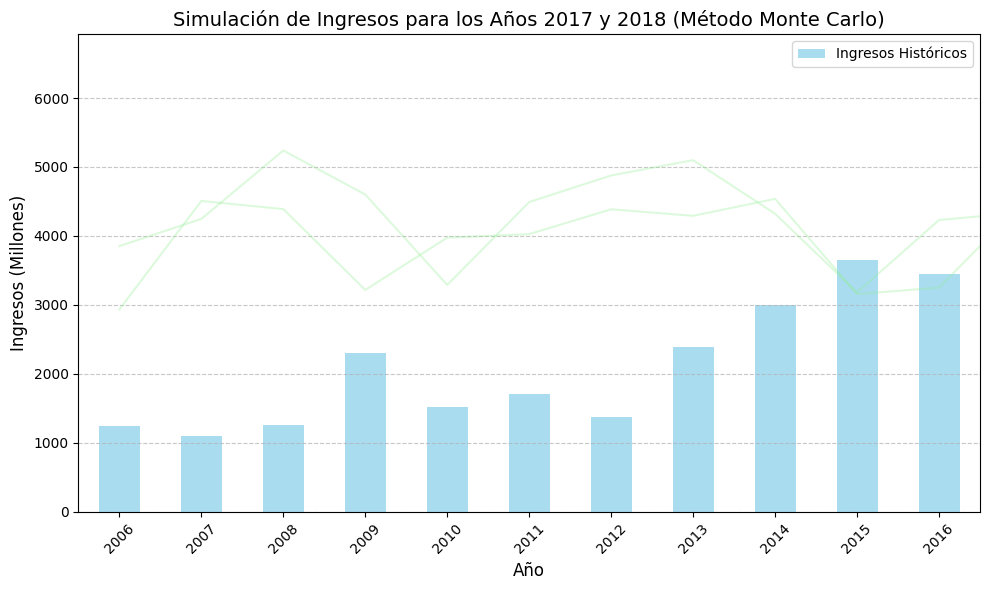

Ingresos promedio simulados para 2017: 3689.05 millones
Ingresos promedio simulados para 2018: 3913.27 millones


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Filtrar los datos para el género 14
genre_14_data = data[data['Genre'] == 21]

# Agrupar por año y sumar los ingresos
revenue_per_year = genre_14_data.groupby('Year')['Revenue (Millions)'].sum()

# Calcular la diferencia de ingresos respecto al año anterior
revenue_difference = revenue_per_year.diff().dropna()

# Simulación de Monte Carlo para los años 2017 y 2018
n_simulations = 1000  # Número de simulaciones

# Calcular la media y la desviación estándar de las diferencias de rendimiento
mean_diff = revenue_difference.mean()
std_diff = revenue_difference.std()

# Último valor conocido (último año disponible antes de 2017, por ejemplo, 2016)
last_known_revenue = revenue_per_year.iloc[-1]

# Simulación para los años 2017 y 2018
simulated_revenues = []

for _ in range(n_simulations):
    future_revenues = [last_known_revenue]
    for year in [2017, 2018]:
        # Generar una diferencia aleatoria para cada año basada en la distribución normal
        random_diff = np.random.normal(mean_diff, std_diff)
        # Calcular el rendimiento proyectado para el año
        future_revenues.append(future_revenues[-1] + random_diff)
    simulated_revenues.append(future_revenues[1:])                                   # guardamos solo los ingresos proyectados para 2017 y 2018


simulated_revenues_df = pd.DataFrame(simulated_revenues, columns=[2017, 2018])       # me imprimie los resultados de estas simualciones antes de la grafica


plt.figure(figsize=(10, 6))
revenue_per_year.plot(kind='bar', color='skyblue', label='Ingresos Históricos', alpha=0.7)


plt.plot(simulated_revenues_df, color='lightgreen', alpha=0.3)                              # grafica las simulaciones
plt.title('Simulación de Ingresos para los Años 2017 y 2018 (Método Monte Carlo)', fontsize=14)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Ingresos (Millones)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.legend()
plt.show()


mean_simulated_revenues = simulated_revenues_df.mean()                                            # Calcular los ingresos promedio simulados para 2017 y 2018
print(f'Ingresos promedio simulados para 2017: {mean_simulated_revenues[2017]:.2f} millones')
print(f'Ingresos promedio simulados para 2018: {mean_simulated_revenues[2018]:.2f} millones')


por ultimo podemos predecir el rendimiento con un modelo mas simple tipo excel o powerbI Y es usar un modelo de regresión lineal, siguiendo el enfoque de Sticker Learning, para predecir los ingresos de 2017 y 2018. Este modelo parte y asume por completo una relación lineal entre los años y los ingresos, lo que implica una tendencia constante en el tiempo. esto obviamente  no considera la variabilidad de los datos históricos, las predicciones obtenidas son más deterministas y menos precisas antes posibles eventos inesperados

In [ ]:
from sklearn.linear_model import LinearRegression

                                                                          # creamos nuestro modelo
model = LinearRegression()

X = revenue_per_year.index.values.reshape(-1, 1)                          # los años son nuestro condicones
y = revenue_per_year.values                                               # los ingresos son variable objetivo
model.fit(X, y)                                                           # aca se auto entrena  el modelo en automatico con los datos
predicted_revenues = model.predict(np.array([2017, 2018]).reshape(-1, 1)) # predicciones para 2017 y 2018

print(f'Predicción para 2017: {predicted_revenues[0]:.2f} millones')
print(f'Predicción para 2018: {predicted_revenues[1]:.2f} millones')

Predicción para 2017: 3535.30 millones
Predicción para 2018: 3775.86 millones


La simulación de Monte Carlo, al considerar la variabilidad histórica de los ingresos, genera un rango de posibles resultados para **2017** y **2018** (entre **3686.39** y **3903.61 millones**). Este enfoque probabilístico captura la incertidumbre de los datos, ofreciendo una estimación más realista que refleja las fluctuaciones y los eventos aleatorios que pueden impactar los ingresos.  

Por el contrario, el modelo de **Sticker Learning**, basado en una regresión lineal, proporciona una predicción más estable y conservadora (**3535.30** y **3775.86 millones**), al ajustarse a una tendencia lineal promedio. Sin embargo, la regresión lineal, al no considerar la variabilidad aleatoria, subestima el potencial de oscilaciones significativas en los ingresos, lo que puede llevar a una proyección menos precisa en entornos dinámicos.  

Aun así, ambos modelos pueden ser considerados correctos en este caso, dado que la tendencia de los datos refleja un aumento en el consumo de este género desde **2012**.
